In [260]:
import numpy as np
import pandas as pd
import Bio.SeqIO as SeqIO
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import os


In [261]:
path = "/home/anwer/Desktop/PPI_prediction/Dataset_ppi/mulitask_transfer_learning_framework_pred_virus_human/data/bacteria/"


# 1. Bacteria-human pairs
## 1.1 Data Preprocessing

In [262]:
data_edgelist = pd.read_csv(path+"hppi_edgelist.csv")
data.head()

,virus,human,Protein_virus_sequence,Protein_human_sequence
2,0,2,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVR...
5,46,5,MSGDPRPADAPGRCRRGQQRRQERPAGPLEDQLQHHPHRGAQQTHR...,MSGTNLDGNDEFDEQLRMQELYGDGKDGDTQTDAGGEPDSLGQQPT...
6,1,6,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...,MRPMRIFVNDDRHVMAKHSSVYPTQEELEAVQNMVSHTERALKAVS...
7,36,7,MNNLWKAWVGLWTSMGPLIRLPDGITKAGEDALRPWKSTAKHPWFE...,MASNVTNKTDPRSMNSRVFIGNLNTLVVKKSDVEAIFSKYGKIVGC...
8,1,8,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...,MERKVLALQARKKRTKAKKDKAQRKSETQHRGSAPHSESDLPEQEE...


In [263]:
data_human_prot = pd.read_csv(path+"hprots.csv")
data_human_prot.head()

,Header_empty
0,protein name
1,P22897
2,Q00403
3,P16070
4,P21675


In [264]:
positive_pairs_0 = pd.read_csv(path + "pos_train_idx_0.csv")
positive_pairs_1 = pd.read_csv(path + "pos_train_idx_1.csv")
positive_pairs_2 = pd.read_csv(path + "pos_train_idx_2.csv")
positive_pairs_3 = pd.read_csv(path + "pos_test_idx_0.csv")
positive_pairs_4 = pd.read_csv(path + "pos_test_idx_1.csv")
positive_pairs_5 = pd.read_csv(path + "pos_test_idx_2.csv")

In [265]:
df = [positive_pairs_0,positive_pairs_1,positive_pairs_2,positive_pairs_3,positive_pairs_4,positive_pairs_5]

In [266]:
merged_pos_pairs = pd.concat(df)
merged_pos_pairs = merged_pos_pairs.drop_duplicates(keep = 'first')
merged_pos_pairs

,virus,human
0,1458,0
1,1259,1
2,1830,2
3,1801,3
4,1766,3
...,...,...
4013,2259,1661
4014,610,1661
4015,2324,1661
4016,943,1661


In [267]:
seq_human = pd.read_csv(path+"hprots_seq.csv")
seq_virus = pd.read_csv(path+"virus_seq.csv")

In [268]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    if len(str(row.blank_1)) <= 1024 and len(str(row.blank_1)) >= 20 :
        name_to_seq_human[index] = str(row.blank_1)
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
    if len(str(row.blank_1)) <= 1024:
        name_to_seq_virus[index] = str(row.blank_1) 

In [269]:
def convert_to_seq_human(index):
    try:
      
        return  str(name_to_seq_human[index])
    except:
        return np.nan

def convert_to_seq_virus(index):
    try:

        return  str(name_to_seq_virus[index])
    except:
        return np.nan

In [270]:
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

In [271]:
merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
data

,virus,human,Protein_virus_sequence,Protein_human_sequence
1,1259,1,MEVVIKKKRTRGKKIFIWSSSIVLLLVICTAIFLNIYTLKSVPKID...,MASTSRLDALPRVTCPNHPDAILVEDYRAGDMICPECGLVVGDRVI...
2,1830,2,MEEKWCNYLLNEGRDWKTMNKTILKTCIISAVLGGVLLTEKNGEVK...,MDKFWWHAAWGLCLVPLSLAQIDLNITCRFAGVFHVEKNGRYSISR...
6,1043,5,MRKIAFFFFLLVIGGAMSSCSRDTTSIKYNKSGLPILDDRHLVAYV...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
7,1398,5,MFVQSALHQLKVAVDTSIQMLDQYTEIDLKIAPIQSKRSLFEMCAH...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
8,1368,6,MKLFHTADWHLGKLVHGVYMTEDQKIVLDQFVQAVEEEKPDAVIIA...,MSHVAVENALGLDQQFAGLDLNSSDNQSGGSTASKGRYIPPHLRNR...
...,...,...,...,...
4013,2259,1661,MPKYRSHTTTHGRNMAGARALWRATGMTDDDFGKPIIAVVNSFTQF...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...
4014,610,1661,MPRALNDRSSALTAQNLIALPERFGCPVWAYDGDIIAERINQLRHF...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...
4015,2324,1661,MEKLLIVNADDFGLCKGQNYGIIDAFRNGVVSSTTAMMNSVDINHA...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...
4016,943,1661,MVQARVILKKNFSGRRKALTLCITLILHIDTAFGQEEPQNFEFDES...,MASKRKSTTPCMVRTSQVVEQDVPEEVDRAKEKGIGTPQPDVAKDS...


In [272]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/human_bacteria_ppi_with_sequences.csv",index = False)

## 1.2 Exploratory Data Analysis

In [273]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/human_bacteria_ppi_with_sequences.csv")
data['Protein_virus_sequence'] = data['Protein_virus_sequence'].map(str)
data['Protein_human_sequence'] = data['Protein_human_sequence'].map(str)
data.head()

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,1259,1,MEVVIKKKRTRGKKIFIWSSSIVLLLVICTAIFLNIYTLKSVPKID...,MASTSRLDALPRVTCPNHPDAILVEDYRAGDMICPECGLVVGDRVI...
1,1830,2,MEEKWCNYLLNEGRDWKTMNKTILKTCIISAVLGGVLLTEKNGEVK...,MDKFWWHAAWGLCLVPLSLAQIDLNITCRFAGVFHVEKNGRYSISR...
2,1043,5,MRKIAFFFFLLVIGGAMSSCSRDTTSIKYNKSGLPILDDRHLVAYV...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
3,1398,5,MFVQSALHQLKVAVDTSIQMLDQYTEIDLKIAPIQSKRSLFEMCAH...,MTAAENVCYTLINVPMDSEPPSEISLKNDLEKGDVKSKTEALKKVI...
4,1368,6,MKLFHTADWHLGKLVHGVYMTEDQKIVLDQFVQAVEEEKPDAVIIA...,MSHVAVENALGLDQQFAGLDLNSSDNQSGGSTASKGRYIPPHLRNR...


In [274]:
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))

Number of unique Proteins:  3134
Maximum length of Proteins sequences:  1024
Minimum length of Proteins sequences:  20


In [275]:
data['virus'] = data['virus'].map(str)
data['human'] = data['human'].map(str)
col_list_protein_A = data['virus'].values.tolist()
col_list_protein_B = data['human'].values.tolist()
count_col_A = Counter(col_list_protein_A)
count_col_B = Counter(col_list_protein_B)
count = count_col_A | count_col_B
count = dict(sorted(count.items(), key=lambda item: item[1],reverse = True))


<Figure size 1440x1440 with 0 Axes>

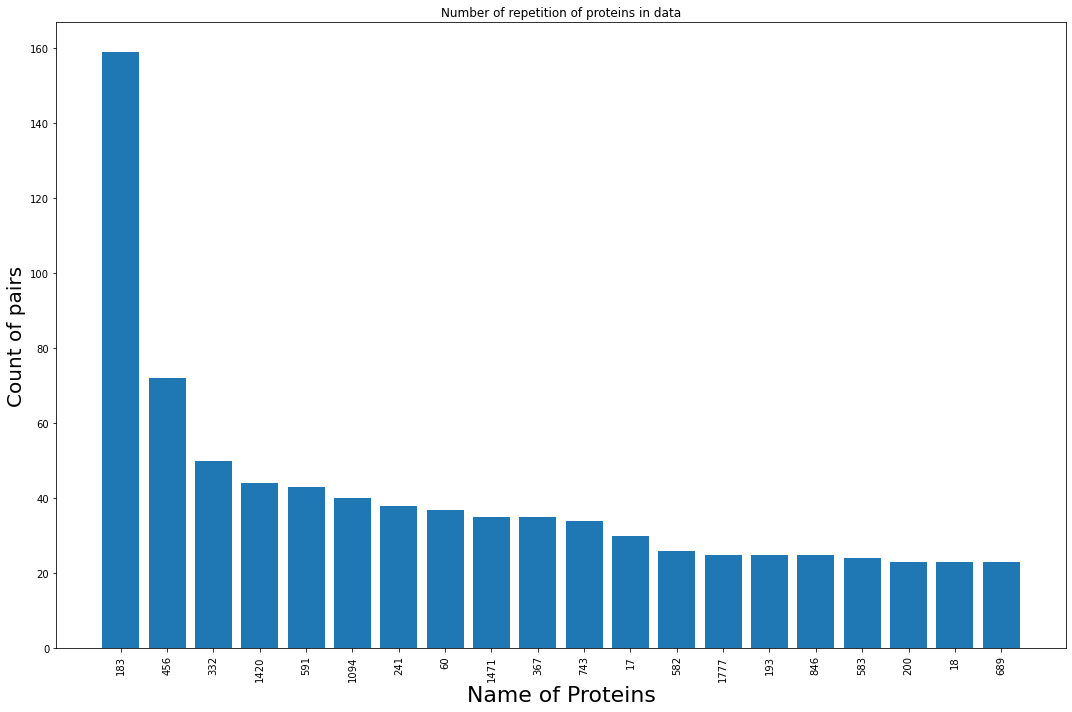

In [276]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in paper:  multitask ppi( collected from BACILLUS ANTHRACIS, YERSINIA PESTIS, FRANCISELLA TULARENESIS)
2. Number of unique pairs: 5892
3. Number of proteins: 3134
4. Max length of sequences: 1024
5. Min lenght of sequences: 20
5. Top 5 redundant proteins: 


     '183': 477,
     '456': 216,
     '332': 150,
     '1420': 132,
     '591': 129,

# 2. BARMAN (Virus-human pairs)

Data collected from VirusMint database

## 2.1 Data Preprocessing

In [293]:
path = "/home/anwer/Desktop/PPI_prediction/Dataset_ppi/mulitask_transfer_learning_framework_pred_virus_human/data/barman/"


In [294]:
data_human_prot = pd.read_csv(path+"hprots.csv")
data_human_prot.head()

,P07305
0,Q14257
1,P30154
2,Q9Y2X9
3,O75348
4,Q14444


In [295]:
positive_pairs_0 = pd.read_csv(path + "pos_train_idx_0.csv")
positive_pairs_1 = pd.read_csv(path + "pos_train_idx_1.csv")
positive_pairs_2 = pd.read_csv(path + "pos_train_idx_2.csv")
positive_pairs_3 = pd.read_csv(path + "pos_train_idx_3.csv")
positive_pairs_4 = pd.read_csv(path + "pos_train_idx_4.csv")
positive_pairs_5 = pd.read_csv(path + "pos_test_idx_0.csv")
positive_pairs_6 = pd.read_csv(path + "pos_test_idx_1.csv")
positive_pairs_7 = pd.read_csv(path + "pos_test_idx_2.csv")
positive_pairs_8 = pd.read_csv(path + "pos_test_idx_3.csv")
positive_pairs_9 = pd.read_csv(path + "pos_test_idx_4.csv")

In [296]:
df = [positive_pairs_0,positive_pairs_1,positive_pairs_2,positive_pairs_3,positive_pairs_4,positive_pairs_5,positive_pairs_6,positive_pairs_7,positive_pairs_8,positive_pairs_9]

In [297]:
merged_pos_pairs = pd.concat(df)
merged_pos_pairs = merged_pos_pairs.drop_duplicates(keep = 'first')

In [298]:
merged_pos_pairs

,virus,human
0,171,0
1,86,1
2,0,2
3,3,3
4,106,4
...,...,...
202,1,215
203,3,663
204,165,664
205,3,665


In [299]:
seq_human = pd.read_csv(path+"hprots_seq.csv")
seq_virus = pd.read_csv(path+"virus_seq.csv")

In [300]:
seq_human

,blank,blank_1
0,P07305,MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...
1,Q14257,MRLGPRTAALGLLLLCAAAAGAGKAEELHYPLGERRSDYDREALLG...
2,P30154,MAGASELGTGPGAAGGDGDDSLYPIAVLIDELRNEDVQLRLNSIKK...
3,Q9Y2X9,MKIGSGFLSGGGGTGSSGGSGSGGGGSGGGGGGGSSGRRAEMEPTF...
4,O75348,MASQSQGIQQLLQAEKRAAEKVSEARKRKNRRLKQAKEEAQAEIEQ...
...,...,...
16723,P0DMP1,MAPRGFSCLLLSTSEIDLPMAPVKRRA
16724,Q9NPH6,MKTLFLGVTLGLAAALSFTLEEEDITGTWYVKAMVVDKDFPEDRRP...
16725,Q9NQR7,MVDPVPEEEKAGAEPGDSGGDEAVASVPPDSQGAQEPAASSASASA...
16726,Q6P5S7,MGWLRPGPRPLCPPARASWAFSHRFPSPLAPRRSPTPFFMASLLCC...


In [301]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        
    name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
    name_to_seq_virus[index] = str(row[1]) 

In [302]:
def convert_to_seq_human(index):
    try:
      
        return  str(name_to_seq_human[index])
    except:
        return np.nan

def convert_to_seq_virus(index):
    try:

        return  str(name_to_seq_virus[index])
    except:
        return np.nan
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

In [304]:
merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
data

Number of unique Proteins:  667
Maximum length of Proteins sequences:  8797
Minimum length of Proteins sequences:  44


,virus,human,Protein_virus_sequence,Protein_human_sequence
0,171,0,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...
1,86,1,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MRLGPRTAALGLLLLCAAAAGAGKAEELHYPLGERRSDYDREALLG...
2,0,2,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MAGASELGTGPGAAGGDGDDSLYPIAVLIDELRNEDVQLRLNSIKK...
3,3,3,MSTNPKPQRKTKRNTNRRPQDVKFPGGGQIVGGVYLLPRRGPRLGV...,MKIGSGFLSGGGGTGSSGGSGSGGGGSGGGGGGGSSGRRAEMEPTF...
4,106,4,MESLVLGVNEKTHVQLSLPVLQVRDVLVRGFGDSVEEALSEAREHL...,MASQSQGIQQLLQAEKRAAEKVSEARKRKNRRLKQAKEEAQAEIEQ...
...,...,...,...,...
202,1,215,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MDLSALRVEEVQNVINAMQKILECPICLELIKEPVSTKCDHIFCKF...
203,3,663,MSTNPKPQRKTKRNTNRRPQDVKFPGGGQIVGGVYLLPRRGPRLGV...,MAAAALLLGLALLAPRAAGAGMGACYDGAGRPQRCLPVFENAAFGR...
204,165,664,MEPRPGASTRRPEGRPQREPAPDVWVFPCDRDLPDSSDSEAETEVG...,MVEAIVEFDYQAQHDDELTISVGEIITNIRKEDGGWWEGQINGRRG...
205,3,665,MSTNPKPQRKTKRNTNRRPQDVKFPGGGQIVGGVYLLPRRGPRLGV...,MQNNEIIKPAKYFSELEKSILLALVEKYKYVLECKKSDARTIALKQ...


#### Keeping maximum length of sequences = 1024

In [305]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
        name_to_seq_virus[index] = str(row[1]) 

In [306]:
def convert_to_seq_human(index):
    try:
      
        return  str(name_to_seq_human[index])
    except:
        return np.nan

def convert_to_seq_virus(index):
    try:

        return  str(name_to_seq_virus[index])
    except:
        return np.nan

In [307]:
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

In [308]:
merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
data

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,171,0,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...
1,86,1,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MRLGPRTAALGLLLLCAAAAGAGKAEELHYPLGERRSDYDREALLG...
2,0,2,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MAGASELGTGPGAAGGDGDDSLYPIAVLIDELRNEDVQLRLNSIKK...
5,46,5,MSKIYIDERSNAEIVCEAIKTIGIEGATAAQLTRQLNMEKREVNKA...,MPSATSHSGSGSKSSGPPPPSGSSGSEAAAGAGAAAPASQHPATGT...
6,1,6,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MDEKVFTKELDQWIEQLNECKQLSESQVKSLCEKAKEILTKESNVQ...
...,...,...,...,...
192,37,153,MRTEMTPLVLSYQEADDILEHLVDNFFNEVPSDDDLYVPSLYELYD...,MPTTSRPALDVKGGTSPAKEDANQEMSSVAYSNLAVKDRKAVAILH...
193,86,658,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MAPSRNGMVLKPHFHKDWQRRVATWFNQPARKIRRRKARQAKARRI...
198,146,271,MGGKWSKRSMGGWSAIRERMRRAEPRAEPAADGVGAVSRDLEKHGA...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
200,164,84,MASSNRGNARPLKSFLHELYLKHYPEVGDVVHLLNTIGVDCDLPPS...,MNIMDFNVKKLAADAGTFLSRAVQFTEEKLGQAEKTELDAHLENLL...


In [309]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/barman_human_virus_ppi_with_sequences.csv",index = False)

## 2.2 Exploratory Data Analysis

In [310]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/barman_human_virus_ppi_with_sequences.csv")
data['Protein_virus_sequence'] = data['Protein_virus_sequence'].map(str)
data['Protein_human_sequence'] = data['Protein_human_sequence'].map(str)
data.head()

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,171,0,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MTENSTSAPAAKPKRAKASKKSTDHPKYSDMIVAAIQAEKNRAGSS...
1,86,1,MGDRSEGPGPTRPGPPGIGPEGPLGQLLRRHRSPSPTRGGQEPRRV...,MRLGPRTAALGLLLLCAAAAGAGKAEELHYPLGERRSDYDREALLG...
2,0,2,MDKVLNREESLQLMDLLGLERSAWGNIPLMRKAYLKKCKEFHPDKG...,MAGASELGTGPGAAGGDGDDSLYPIAVLIDELRNEDVQLRLNSIKK...
3,46,5,MSKIYIDERSNAEIVCEAIKTIGIEGATAAQLTRQLNMEKREVNKA...,MPSATSHSGSGSKSSGPPPPSGSSGSEAAAGAGAAAPASQHPATGT...
4,1,6,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MDEKVFTKELDQWIEQLNECKQLSESQVKSLCEKAKEILTKESNVQ...


In [311]:
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))

Number of unique Proteins:  401
Maximum length of Proteins sequences:  1014
Minimum length of Proteins sequences:  54


In [312]:
data['virus'] = data['virus'].map(str)
data['human'] = data['human'].map(str)
col_list_protein_A = data['virus'].values.tolist()
col_list_protein_B = data['human'].values.tolist()
count_col_A = Counter(col_list_protein_A)
count_col_B = Counter(col_list_protein_B)
count = count_col_A | count_col_B
count = dict(sorted(count.items(), key=lambda item: item[1],reverse = True))

<Figure size 1440x1440 with 0 Axes>

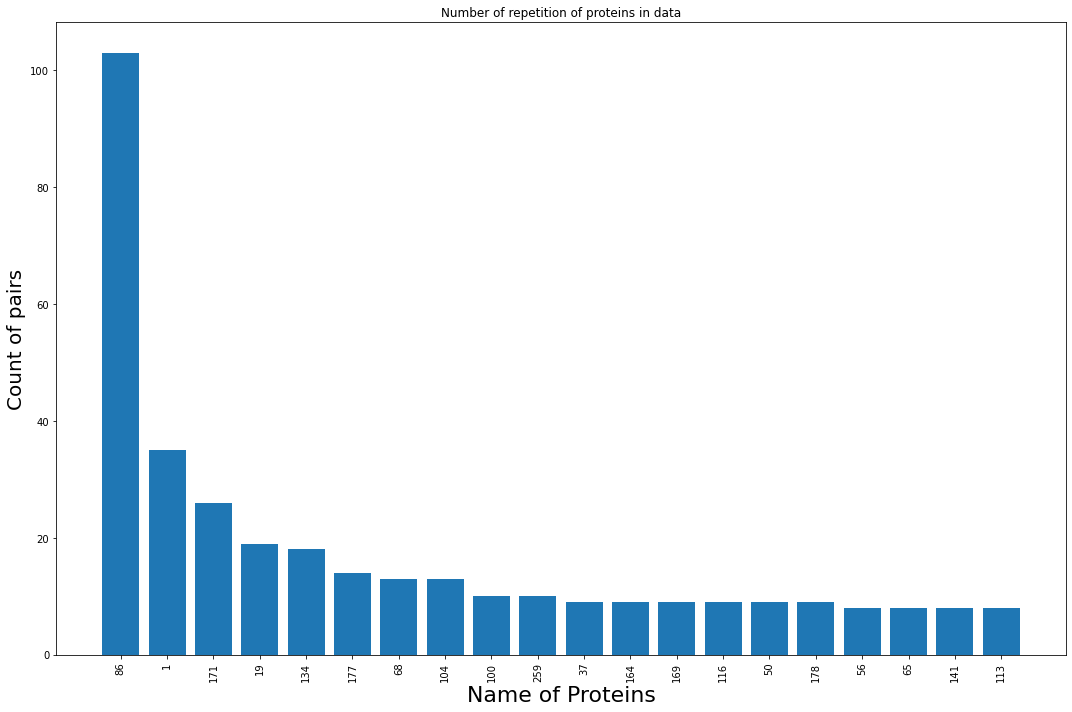

In [313]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in paper:  multitask ppi( collected from VirusMINT)
2. Number of unique pairs:590
3. Number of proteins: 401
4. Max length of sequences: 1014
5. Min lenght of sequences: 54
5. Top 5 redundant proteins: 


     '86': 103,
     '1': 35,
     '171': 26,
     '19': 19,
     '134': 18

# 3. H1N1 Virus-human pairs

Collected from APID, IntAct, VirusMentha, and UniProt

## 3.1 Data Preprocessing

In [314]:
path = "/home/anwer/Desktop/PPI_prediction/Dataset_ppi/mulitask_transfer_learning_framework_pred_virus_human/data/h1n1/"


In [315]:
data_human_prot = pd.read_csv(path+"hprots.csv")
data_human_prot.head()

,Q08999
0,P28749
1,P06400
2,Q15223
3,Q7Z434
4,O43719


In [316]:
positive_pairs_0 = pd.read_csv(path + "pos_train_idx.csv")
positive_pairs_1 = pd.read_csv(path + "pos_test_idx.csv")
positive_pairs_0 

,virus,human
0,0,0
1,0,1
2,0,2
3,1,3
4,2,4
...,...,...
10853,638,38
10854,638,95
10855,639,443
10856,640,39


In [318]:
df = [positive_pairs_0,positive_pairs_1]
merged_pos_pairs = pd.concat(df)
merged_pos_pairs = merged_pos_pairs.drop_duplicates(keep = 'first')
merged_pos_pairs

,virus,human
0,0,0
1,0,1
2,0,2
3,1,3
4,2,4
...,...,...
376,651,2974
377,651,988
378,651,3047
379,651,780


In [319]:
seq_human = pd.read_csv(path+"hprots_seq.csv")
seq_virus = pd.read_csv(path+"virus_seq.csv")
seq_virus

,blank,blank_1
0,A0MPS7,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...
1,A1Z0Q5,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...
2,A2T3M4,MATFKDACFHYRRLTALNRRLCNIGANSICMPVPDAKIKGWCLECC...
3,A4ZNP8,MASQGTKRSYEQMETDGERQNATEIRASVGKMIGGIGRFYIQMCTE...
4,A6H4P0,EMADKALFAAARFPECPEGSSISAPSQTSVDVSLIQDIERILDYSL...
...,...,...
647,P03468,MNPNQKIITIGSICLVVGLISLILQIGNIISIWISHSIQTGSQNHT...
648,P03485,MSLLTEVETYVLSIIPSGPLKAEIAQRLEDVFAGKNTDLEVLMEWL...
649,P03496,MDPNTVSSFQVDCFLWHVRKRVADQELGDAPFLDRLRRDQKSLRGR...
650,P03508,MDPNTVSSFQDILLRMSKMQLESSSGDLNGMITQFESLKLYRDSLG...


In [320]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        
    name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
    name_to_seq_virus[index] = str(row[1]) 

In [321]:
def convert_to_seq_human(index):
    try:
      
        return  str(name_to_seq_human[index])
    except:
        return np.nan

def convert_to_seq_virus(index):
    try:

        return  str(name_to_seq_virus[index])
    except:
        return np.nan
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

In [322]:
# merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
data

Number of unique Proteins:  3881
Maximum length of Proteins sequences:  8797
Minimum length of Proteins sequences:  44


,virus,human,Protein_virus_sequence,Protein_human_sequence
0,0,0,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MPSGGDQSPPPPPPPPAAAASDEEEEDDGEAEDAAPPAESPTPQIQ...
1,0,1,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MFEDKPHAEGAAVVAAAGEALQALCQELNLDEGSAAEALDDFTAIR...
2,0,2,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVR...
3,1,3,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...,MARMGLAGAAGRWWGLALGLTAFFLPGVHSQVVQVNDSMYGFIGTD...
4,2,4,MATFKDACFHYRRLTALNRRLCNIGANSICMPVPDAKIKGWCLECC...,MPFAEDKTYKYICRNFSNFCNVDVVEILPYLPCLTARDQDRLRATC...
...,...,...,...,...
376,651,2974,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MAWALKLPLADEVIESGLVQDFDASLSGIGQELGAGAYSMSDVLAL...
377,651,988,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MGTTSDEMVSVEQTSSSSLNPLCFECGQQHWTRENHLYNYQNEVDD...
378,651,3047,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MGETKIIYHLDGQETPYLVKLPLPAERVTLADFKGVLQRPSYKFFF...
379,651,780,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MNNGGKAEKENTPSEANLQEEEVRTLFVSGLPLDIKPRELYLLFRP...


#### Keeping maximum length of sequences = 1024

In [323]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
        name_to_seq_virus[index] = str(row[1])

In [324]:
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

In [326]:
merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
data

,virus,human,Protein_virus_sequence,Protein_human_sequence
2,0,2,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVR...
3,1,3,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...,MARMGLAGAAGRWWGLALGLTAFFLPGVHSQVVQVNDSMYGFIGTD...
4,2,4,MATFKDACFHYRRLTALNRRLCNIGANSICMPVPDAKIKGWCLECC...,MPFAEDKTYKYICRNFSNFCNVDVVEILPYLPCLTARDQDRLRATC...
5,3,5,MASQGTKRSYEQMETDGERQNATEIRASVGKMIGGIGRFYIQMCTE...,MSGTNLDGNDEFDEQLRMQELYGDGKDGDTQTDAGGEPDSLGQQPT...
6,4,6,EMADKALFAAARFPECPEGSSISAPSQTSVDVSLIQDIERILDYSL...,MRPMRIFVNDDRHVMAKHSSVYPTQEELEAVQNMVSHTERALKAVS...
...,...,...,...,...
375,651,423,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MEHPLFGCLRSPHATAQGLHPFSQSSLALHGRSDHMSYPELSTSSS...
376,651,2974,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MAWALKLPLADEVIESGLVQDFDASLSGIGQELGAGAYSMSDVLAL...
377,651,988,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MGTTSDEMVSVEQTSSSSLNPLCFECGQQHWTRENHLYNYQNEVDD...
378,651,3047,MSLLTEVETPIRNEWGCRCNGSSDPLAIAANIIGILHLILWILDRL...,MGETKIIYHLDGQETPYLVKLPLPAERVTLADFKGVLQRPSYKFFF...


In [327]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/h1n1_human_virus_ppi_with_sequences.csv",index = False)

## 3.2 Exploratory Data Analysis

In [328]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/h1n1_human_virus_ppi_with_sequences.csv")
data['Protein_virus_sequence'] = data['Protein_virus_sequence'].map(str)
data['Protein_human_sequence'] = data['Protein_human_sequence'].map(str)
data.head()

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,0,2,MHGDTPTLHEYMLDLQPETTDLYCYEQLNDSSEEEDEIDGPAGQAE...,MPPKTPRKTAATAAAAAAEPPAPPPPPPPEEDPEQDSGPEDLPLVR...
1,1,3,MGGAAARLGAVILFVVIVGLHGVRGKYALADASLKMADPNRFRGKD...,MARMGLAGAAGRWWGLALGLTAFFLPGVHSQVVQVNDSMYGFIGTD...
2,2,4,MATFKDACFHYRRLTALNRRLCNIGANSICMPVPDAKIKGWCLECC...,MPFAEDKTYKYICRNFSNFCNVDVVEILPYLPCLTARDQDRLRATC...
3,3,5,MASQGTKRSYEQMETDGERQNATEIRASVGKMIGGIGRFYIQMCTE...,MSGTNLDGNDEFDEQLRMQELYGDGKDGDTQTDAGGEPDSLGQQPT...
4,4,6,EMADKALFAAARFPECPEGSSISAPSQTSVDVSLIQDIERILDYSL...,MRPMRIFVNDDRHVMAKHSSVYPTQEELEAVQNMVSHTERALKAVS...


In [329]:
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))

Number of unique Proteins:  2866
Maximum length of Proteins sequences:  1024
Minimum length of Proteins sequences:  44


<Figure size 1440x1440 with 0 Axes>

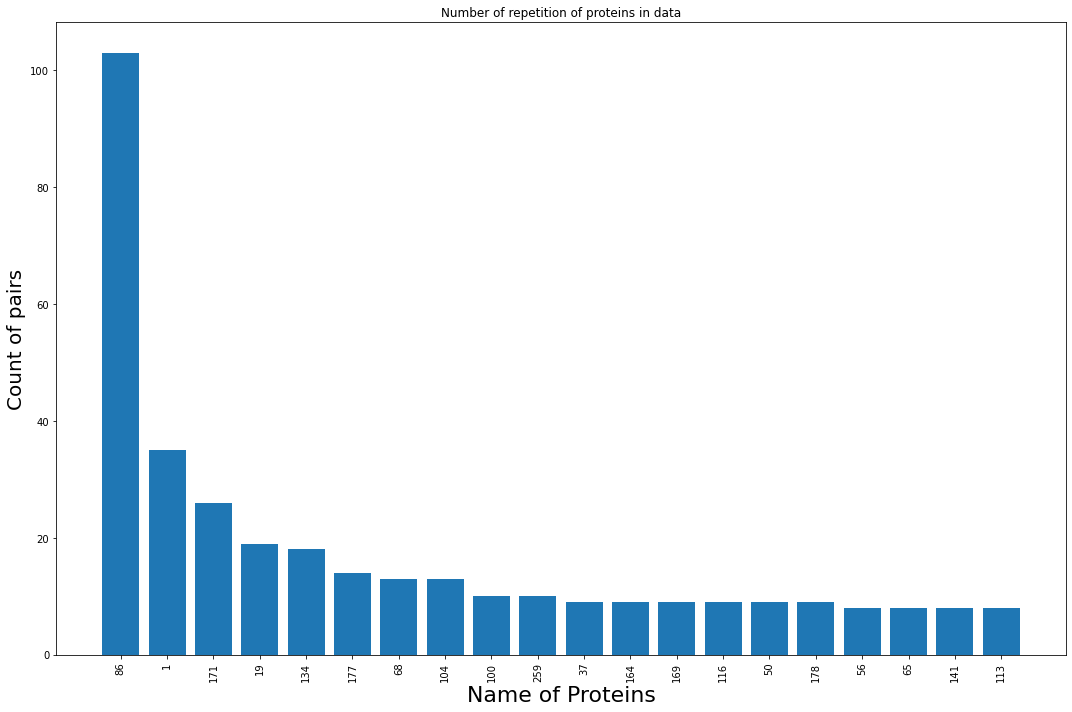

In [330]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in paper:  multitask ppi
2. Number of unique pairs: 8044
3. Number of proteins: 2866
4. Max length of sequences: 1024
5. Min lenght of sequences: 44
5. Top 5 redundant proteins: 


     '86': 103,
     '1': 35,
     '171': 26,
     '19': 19,
     '134': 18

# 4. Ebola Virus-human pairs

Collected from APID, IntAct, VirusMentha, and UniProt

## 4.1 Data Preprocessing

In [332]:
path = "/home/anwer/Desktop/PPI_prediction/Dataset_ppi/mulitask_transfer_learning_framework_pred_virus_human/data/ebola/"

In [333]:
positive_pairs_0 = pd.read_csv(path + "pos_train_idx.csv")
positive_pairs_1 = pd.read_csv(path + "pos_test_idx.csv")
positive_pairs_0 

,virus,human
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
11336,85,3905
11337,199,3905
11338,77,3905
11339,35,3906


In [334]:
df = [positive_pairs_0,positive_pairs_1]
merged_pos_pairs = pd.concat(df)
merged_pos_pairs = merged_pos_pairs.drop_duplicates(keep = 'first')
merged_pos_pairs

,virus,human
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
145,660,3641
146,660,3668
147,659,3739
148,659,3923


In [350]:
print(path)
seq_human = pd.read_csv(path+"hprots_seq.csv")
seq_virus = pd.read_csv(path+"virus_seq.csv")
seq_human.head()

/home/anwer/Desktop/PPI_prediction/Dataset_ppi/mulitask_transfer_learning_framework_pred_virus_human/data/ebola/


,blank,blank_1
0,A0AV02,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...
1,A0FGR8,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
2,A0MZ66,MNSSDEEKQLQLITSLKEQAIGEYEDLRAENQKTKEKCDKIRQERD...
3,A1KXE4,MNPVYSPGSSGVPYANAKGIGYPAGFPMGYAAAAPAYSPNMYPGAN...
4,A1L0V1,LVRRMVPRRDQALTEEHARQQHNERLRKQFGAQANVIGPWIQTKME...


In [338]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        
    name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
    name_to_seq_virus[index] = str(row[1]) 

In [339]:
def convert_to_seq_human(index):
    try:
      
        return  str(name_to_seq_human[index])
    except:
        return np.nan

def convert_to_seq_virus(index):
    try:

        return  str(name_to_seq_virus[index])
    except:
        return np.nan
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)
# merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
data

Number of unique Proteins:  3924
Maximum length of Proteins sequences:  8797
Minimum length of Proteins sequences:  44


,virus,human,Protein_virus_sequence,Protein_human_sequence
0,0,0,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...
1,1,1,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
2,2,1,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
3,3,1,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
4,4,1,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
...,...,...,...,...
145,660,3641,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLFAIKVFNNISFL...
146,660,3668,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...,MAPLLGRKPFPLVKPLPGEEPLFTIPHTQEAFRTREEYEARLERYS...
147,659,3739,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...,MAPKGSSKQQSEEDLLLQDFSRNLSAKSSALFFGNAFIVSAIPIWL...
148,659,3923,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...,MAASELYTKFARVWIPDPEEVWKSAELLKDYKPGDKVLLLHLEEGK...


#### Keeping maximum length of sequences = 1024

In [351]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
        name_to_seq_virus[index] = str(row[1])

In [352]:
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

In [353]:
merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
data

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,0,0,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...
1,1,1,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
2,2,1,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
3,3,1,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
4,4,1,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
...,...,...,...,...
143,659,3921,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...,MPRKKAAAAAWEEPSSGNGTARAGPRKRGGPAGRKRERPERCSSSS...
144,659,3922,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...
145,660,3641,MTTRTKGRGHTAATTQNDRMPGPELSGWISEQLMTGRIPVSDIFCD...,MQSTSNHLWLLSDILGQGATANVFRGRHKKTGDLFAIKVFNNISFL...
147,659,3739,MAKATGRYNLISPKKDLEKGVVLSDLCNFLVSQTIQGWKVYWAGIE...,MAPKGSSKQQSEEDLLLQDFSRNLSAKSSALFFGNAFIVSAIPIWL...


In [354]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/ebola_human_virus_ppi_with_sequences.csv",index = False)

## 4.2 Exploratory Data Analysis

In [360]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/ebola_human_virus_ppi_with_sequences.csv")
data['Protein_virus_sequence'] = data['Protein_virus_sequence'].map(str)
data['Protein_human_sequence'] = data['Protein_human_sequence'].map(str)
data.head()

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,0,0,MAEGAEHQQKLTEKDKAELPLSIRDLAEALGIPVIDCLIPCNFCGN...,MTQMSQVQELFHEAAQQDALAQPQPWWKTQLFMWEPVLFGTWDGVF...
1,1,1,MAYSTREILLALCIRDSRVHGNGTLHPVLELAARETPLRLSPEDTV...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
2,2,1,MVHVLERALLEQQSSACGLPGSSTETRPSHPCPEDPDVSRLRLLLV...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
3,3,1,MGSNSLSMIKVRLQNLFDNDEVALLKITCYTDKLIHLTNALAKAVI...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...
4,4,1,MAEEQARHVKNGLECIRALKAEPIGSLAIEEAMAAWSEISDNPGQE...,MTANRDAALSSHRHPGCAQRPRTPTFASSSQRRSAFGFDDGNFPGL...


In [361]:
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))

Number of unique Proteins:  2980
Maximum length of Proteins sequences:  1024
Minimum length of Proteins sequences:  44


<Figure size 1440x1440 with 0 Axes>

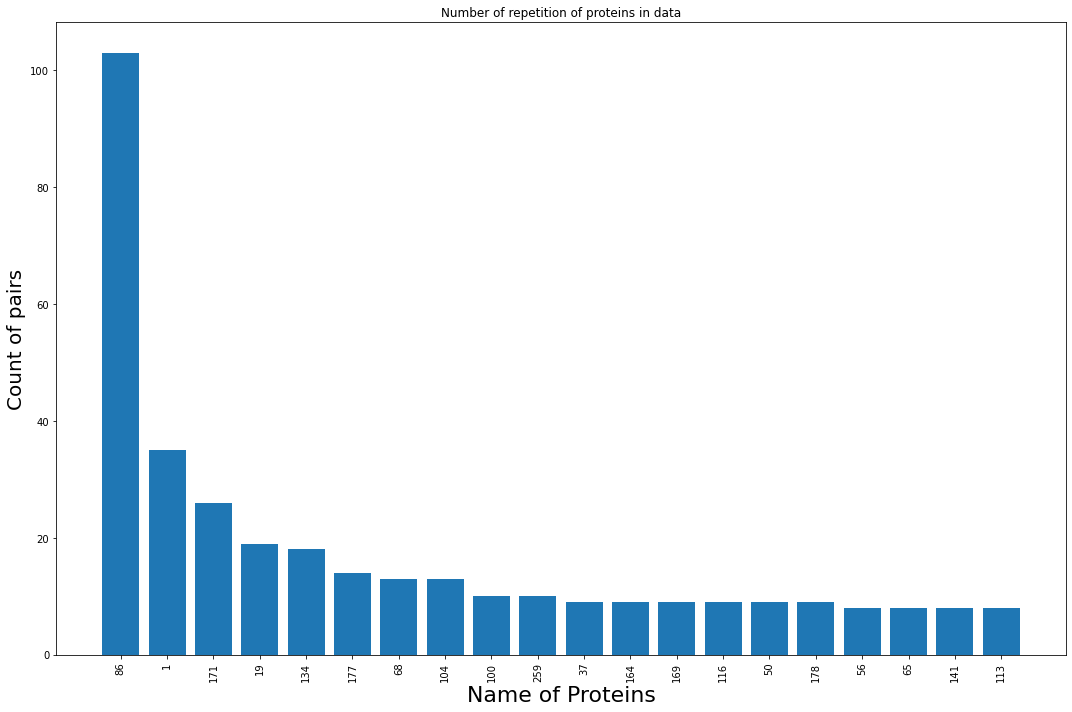

In [362]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()

### Summary of EDA
1. Published in paper:  multitask ppi
2. Number of unique pairs: 8260
3. Number of proteins: 2980
4. Max length of sequences: 1024
5. Min lenght of sequences: 44
5. Top 5 redundant proteins: 


     '86': 103,
     '1': 35,
     '171': 26,
     '19': 19,
     '134': 18,

# 5. SARS Virus-human pairs

Only Direct Interaction

## 5.1 Data Preprocessing

In [365]:
path = "/home/anwer/Desktop/PPI_prediction/Dataset_ppi/mulitask_transfer_learning_framework_pred_virus_human/data/sar//"


In [369]:
positive_pairs_0 = pd.read_csv(path + "pos_train_idx.csv")
positive_pairs_1 = pd.read_csv(path + "pos_test_idx.csv")
positive_pairs_0.drop_duplicates(keep = 'first')

,virus,human
0,408,1008
1,166,223
2,799,1581
3,155,4973
4,369,5322
...,...,...
549,404,5039
550,243,3978
551,234,754
552,697,754


In [370]:
df = [positive_pairs_0,positive_pairs_1]
merged_pos_pairs = pd.concat(df)
merged_pos_pairs = merged_pos_pairs.drop_duplicates(keep = 'first')
merged_pos_pairs

,virus,human
0,408,1008
1,166,223
2,799,1581
3,155,4973
4,369,5322
...,...,...
550,243,3978
551,234,754
552,697,754
553,664,754


In [368]:
seq_human = pd.read_csv(path+"hprots_seq.csv")
seq_virus = pd.read_csv(path+"virus_seq.csv")
seq_virus

,blank,blank_1
0,O41932,MAESHPWSGRPSSSPRRSSTFANYAWKHTIKPNRILIRNARPLVIN...
1,P16717,MDRALSTFPGDDDETNERNINHREKTSGEHGHYEDKLLDLSEEEPN...
2,C5E519,MSLLTEVETPTRSEWECRCSDSSDPLVIAANIIGILHLILWITDRL...
3,F5HE15,MNSSGQEDIISIPKSAFLSMLQSSIDGMKTTAAKMSHTLSGPGLMG...
4,Q2PJP0,MDSNTVSSFQVDCFLWHVRKRFADQELGDAPFLDRLRRDQKSLRGR...
...,...,...
831,P03208,MLSTMAPGSTVGTLVANMTSVNATEDACTKSYSAFLSGMTSLLLVL...
832,Q89269,MELVGWLVDKGITSEKQWIQEDQASYISFNAASNSRSQIKAALDNA...
833,P30119,MLKCKQPGARFIHGAVHLPSGQIVFHTIHSPTLASALGLPGENVPI...
834,P59594,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...


In [371]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        
    name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
#     if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
    name_to_seq_virus[index] = str(row[1]) 
    
def convert_to_seq_human(index):
    try:
      
        return  str(name_to_seq_human[index])
    except:
        return np.nan

def convert_to_seq_virus(index):
    try:
count
        return  str(name_to_seq_virus[index])
    except:
        return np.nan
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)

# merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
data

Number of unique Proteins:  417
Maximum length of Proteins sequences:  7078
Minimum length of Proteins sequences:  81


,virus,human,Protein_virus_sequence,Protein_human_sequence
0,408,1008,MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,MPKSKELVSSSSSGSDSDSEVDKKLKRKKQVAPEKPVKKQKTGETS...
1,166,223,MRHIICHGGVITEEMAASLLDQLIEEVLADNLPPPSHFEPPTLHEL...,MGSSHLLNKGLPLGVRPPIMNGPLHPRPLVALLDGRDCTVEMPILK...
2,799,1581,MAARVCCQLDPARDVLCLRPVGAESRGRPISGPFGPLPSPSSSAVP...,MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQ...
3,155,4973,MQPIQIAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...,MDPAEAVLQEKALKFMCSMPRSLWLGCSSLADSMPSLRCLYNPGTG...
4,369,5322,MGGKWSKSSVVGWPAVRERMRRAEPAADGVGAASRDLEKHGAITSS...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
...,...,...,...,...
550,243,3978,MSFVAGVTAQGARGTYRAALNSEKHQDHVSLTVPLCGSGNLVEKLS...,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...
551,234,754,MKLLVLVFATLVSSYTIEKCLDFDDRTPPANTQFLSSHRGVYYPDD...,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...
552,697,754,MLFFFFLHFALVNSQCVNLTGRAAIQPSFTNSSQRGVYYPDTIFRS...,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...
553,664,754,MFVFLFVLPLVSSQCVNLTTRTGIQPGYTNSSTRGVYYPDKVFRSS...,MSSSSWLLLSLVAVTAAQSTIEEQAKTFLDKFNHEAEDLFYQSSLA...


#### Keeping maximum length of sequences = 1024

In [373]:
name_to_seq_human = {}
for index,row in seq_human.iterrows():
    
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20 :
        name_to_seq_human[index] = str(row[1])
name_to_seq_virus = {}
for index,row in seq_virus.iterrows():
    if len(str(row[1])) <= 1024 and len(str(row[1])) >= 20:
        name_to_seq_virus[index] = str(row[1])
merged_pos_pairs["Protein_virus_sequence"] = merged_pos_pairs['virus'].apply(convert_to_seq_virus)
merged_pos_pairs["Protein_human_sequence"] = merged_pos_pairs['human'].apply(convert_to_seq_human)
merged_pos_pairs.dropna(inplace= True)
data = merged_pos_pairs
data

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,408,1008,MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,MPKSKELVSSSSSGSDSDSEVDKKLKRKKQVAPEKPVKKQKTGETS...
1,166,223,MRHIICHGGVITEEMAASLLDQLIEEVLADNLPPPSHFEPPTLHEL...,MGSSHLLNKGLPLGVRPPIMNGPLHPRPLVALLDGRDCTVEMPILK...
2,799,1581,MAARVCCQLDPARDVLCLRPVGAESRGRPISGPFGPLPSPSSSAVP...,MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQ...
3,155,4973,MQPIQIAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...,MDPAEAVLQEKALKFMCSMPRSLWLGCSSLADSMPSLRCLYNPGTG...
4,369,5322,MGGKWSKSSVVGWPAVRERMRRAEPAADGVGAASRDLEKHGAITSS...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...
...,...,...,...,...
540,48,3348,MATVKWADASEPQRGRQGRIPYSLYSPLLVDSEQPWKVIPRNLVPI...,MGKEKTHINIVVIGHVDSGKSTTTGHLIYKCGGIDKRTIEKFEKEA...
545,738,479,MSDNGPQSNQRSAPRITFGGPTDSTDNNQNGGRNGARPKQRRPQGL...,MEDSMDMDMSPLRPQNYLFGCELKADKDYHFKVDNDENEHQLSLRT...
547,404,2191,MKANLLVLLCALAAADADTICIGYHANNSTDTVDTVLEKNVTVTHS...,MSSTLPALLCVGLCLSQRISAQQQTLPKPFIWAEPHFMVPKEKQVT...
548,404,2836,MKANLLVLLCALAAADADTICIGYHANNSTDTVDTVLEKNVTVTHS...,MLWLFQSLLFVFCFGPGNVVSQSSLTPLMVNGILGESVTLPLEFPA...


In [380]:
data.to_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/sars_direct_interaction_human_virus_ppi_with_sequences.csv",index = False)

## 5.2 Exploratory Data Analysis

In [381]:
data = pd.read_csv("/home/anwer/Desktop/PPI_prediction/csv_files/multitask/sars_direct_interaction_human_virus_ppi_with_sequences.csv")
data['Protein_virus_sequence'] = data['Protein_virus_sequence'].map(str)
data['Protein_human_sequence'] = data['Protein_human_sequence'].map(str)
data.head()

,virus,human,Protein_virus_sequence,Protein_human_sequence
0,408,1008,MEPVDPRLEPWKHPGSQPKTACTNCYCKKCCFHCQVCFITKALGIS...,MPKSKELVSSSSSGSDSDSEVDKKLKRKKQVAPEKPVKKQKTGETS...
1,166,223,MRHIICHGGVITEEMAASLLDQLIEEVLADNLPPPSHFEPPTLHEL...,MGSSHLLNKGLPLGVRPPIMNGPLHPRPLVALLDGRDCTVEMPILK...
2,799,1581,MAARVCCQLDPARDVLCLRPVGAESRGRPISGPFGPLPSPSSSAVP...,MDTKHFLPLDFSTQVNSSLTSPTGRGSMAAPSLHPSLGPGIGSPGQ...
3,155,4973,MQPIQIAIVALVVAIIIAIVVWSIVIIEYRKILRQRKIDRLIDRLI...,MDPAEAVLQEKALKFMCSMPRSLWLGCSSLADSMPSLRCLYNPGTG...
4,369,5322,MGGKWSKSSVVGWPAVRERMRRAEPAADGVGAASRDLEKHGAITSS...,MGGRSSCEDPGCPRDEERAPRMGCMKSKFLQVGGNTFSKTETSASP...


In [376]:
print("Number of unique Proteins: ", len(set(data['virus']).union(set(data['human']))) )
print("Maximum length of Proteins sequences: ", len(max(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))
print("Minimum length of Proteins sequences: ", len(min(set(data['Protein_virus_sequence']).union(set(data['Protein_human_sequence'])),key=len)))

Number of unique Proteins:  322
Maximum length of Proteins sequences:  1024
Minimum length of Proteins sequences:  81


<Figure size 1440x1440 with 0 Axes>

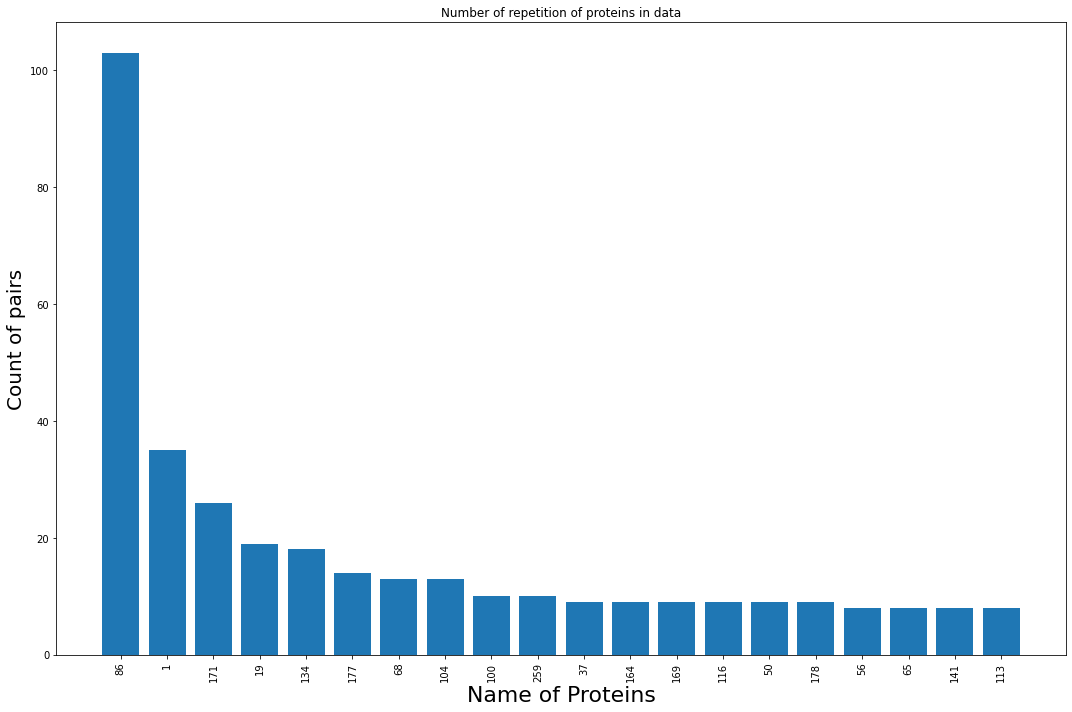

In [377]:
keys = count.keys()
values = count.values()
plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(list(keys)[0:20], list(values)[0:20])
ax.set_xlabel('x-axis', fontsize = 22)
ax.set_ylabel('y-axis', fontsize = 20)
plt.ylabel('Count of pairs')
plt.xlabel('Name of Proteins')
plt.xticks(rotation=90)
plt.title("Number of repetition of proteins in data")
plt.tight_layout()
plt.show()


    
### Summary of EDA
1. Published in paper:  multitask ppi
2. Number of unique pairs: 308
3. Number of proteins: 322
4. Max length of sequences: 1024
5. Min lenght of sequences: 81
5. Top 5 redundant proteins: 


     '86': 103,
     '1': 35,
     '171': 26,
     '19': 19,
     '134': 18,